# RSRS(阻力支撑相对强度)择时

### 一、 阻力支撑相关概念

* 阻力位是指指标价格上涨时可能遇到的压力，即交易者认为卖方力量开始反超买方，从而价格难以继续上涨或从此回调下跌的价位；  
* 支撑位则是交易者认为买方力量开始反超卖方，从而止跌或反弹上涨的价位。

常见的确定阻力支撑位的方法有:    
* 布林带上下轨突破策略（突破上轨建仓买入，突破下轨卖出平仓）
* 均线策略（如超过20日均线建仓买入，低于20日均线卖出平仓）。  

然而，布林带突破策略在震荡期间出现了持续亏损，均线策略交易交易成本巨大，且在震荡期间的回撤很大。

### 二、阻力支撑相对强度（RSRS）

阻力支撑相对强度(Resistance Support Relative Strength, RSRS)是另一种阻力位与支撑位的运用方式，   
它不再把阻力位与支撑位当做一个定值，而是**看做一个变量**，反应了交易者对目前市场状态顶底的一种预期判断。

我们按照不同市场状态分类来说明支撑阻力相对强度的应用逻辑：

1.市场在上涨牛市中：  
如果支撑明显强于阻力，牛市持续，价格加速上涨  
如果阻力明显强于支撑，牛市可能即将结束，价格见顶  

2.市场在震荡中：  
如果支撑明显强于阻力，牛市可能即将启动  
如果阻力明显强于支撑，熊市可能即将启动  

3.市场在下跌熊市中：  
如果支撑明显强于阻力，熊市可能即将结束，价格见底  
如果阻力明显强于支撑，熊市持续，价格加速下跌  

每日最高价和最低价是一种阻力位与支撑位，它是当日全体市场参与者的交易行为所认可的阻力与支撑。一个很自然的想法是建立最高价和最低价的线性回归，并计算出斜率。即：

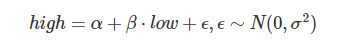

> 为什么要在最高价和最低价建立回归？

当斜率值很大时，支撑强度大于阻力强度。在牛市中阻力渐小，上方上涨空间大；在熊市中支撑渐强，下跌势头欲止。   
当斜率值很小时，阻力强度大于支撑强度。在牛市中阻力渐强，上涨势头渐止；在熊市中支撑渐送，下方下跌空间渐大。

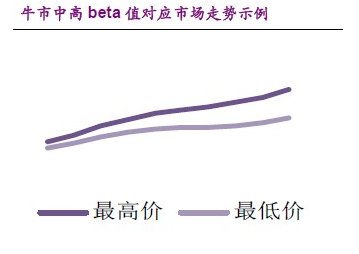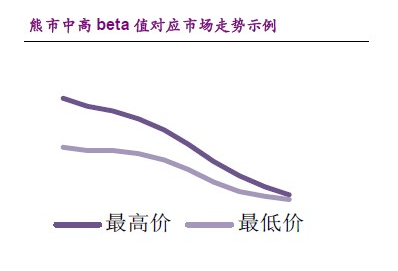  
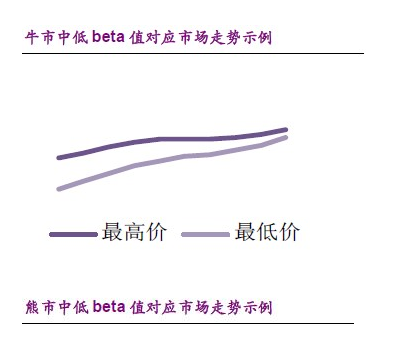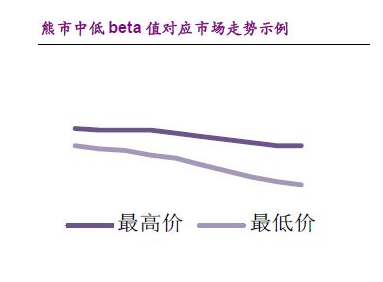

#### 线性回归

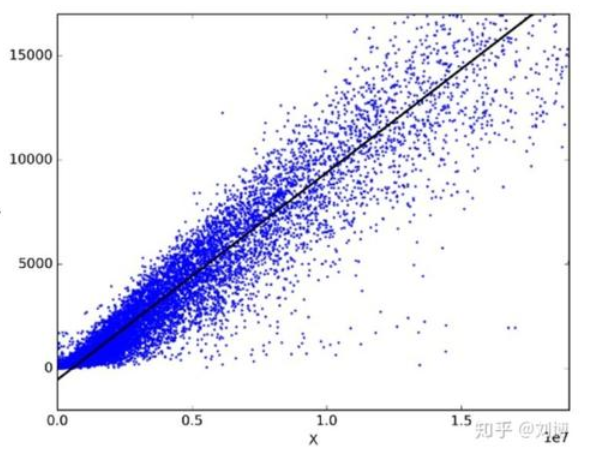

正切函数图像    
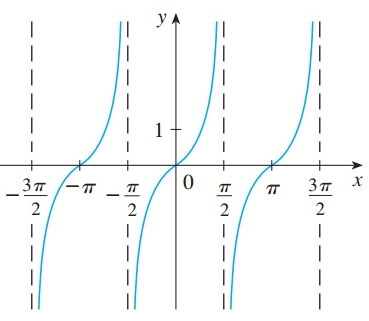

In [ ]:
当Y=f(X)的形式是一个直线方程时，称为一元线性回归。这个方程一般可表示为Y=A+BX。  
根据最小平方法或其他方法，可以从样本数据确定常数项A与回归系数B的值。A、B确定后，有一个X的观测值，就可得到一个Y的估计值。

### 三、阻力支撑相对强度（RSRS）指标择时策略

第一种方法是直接将斜率作为指标值。当日RSRS斜率指标择时策略如下：  
1、取前N日最高价与最低价序列。（N = 18）  
2、将两个序列进行OLS线性回归。  
3、将拟合后的β值作为当日RSRS斜率指标值。  
4、当RSRS斜率大于Sbuy时，全仓买入，小于Ssell时，卖出平仓。（Sbuy=1,Ssell=0.8）即买入时倾角大于45°，卖出时倾角小于38.6° 

由于市场处于不同时期时，斜率的均值有比较大的波动。因此，直接采用斜率均值作为择时指标并不太合适。我们尝试下面的方法。

第二种方法是在斜率基础上进行标准化，取标准分作为指标值。RSRS斜率标准分指标择时策略如下：  
1、取前M日的RSRS斜率时间序列。（M = 600）   
2、计算当日RSRS斜率的标准分RSRSstd：   

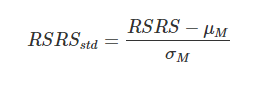

其中μM为前M日的斜率均值，σM为前M日的标准差。  
3、若RSRSstd大于Sbuy，则全仓买入；若RSRSstd小于Ssell，则卖出平仓。（Sbuy=0.7,Ssell=−0.7）

注：benchmark和标的股票均为沪深300指数，尝试N取自10-30，M取自400-800，发现N=18，M=600时收益率最高。

王府井 3.2-11.13  
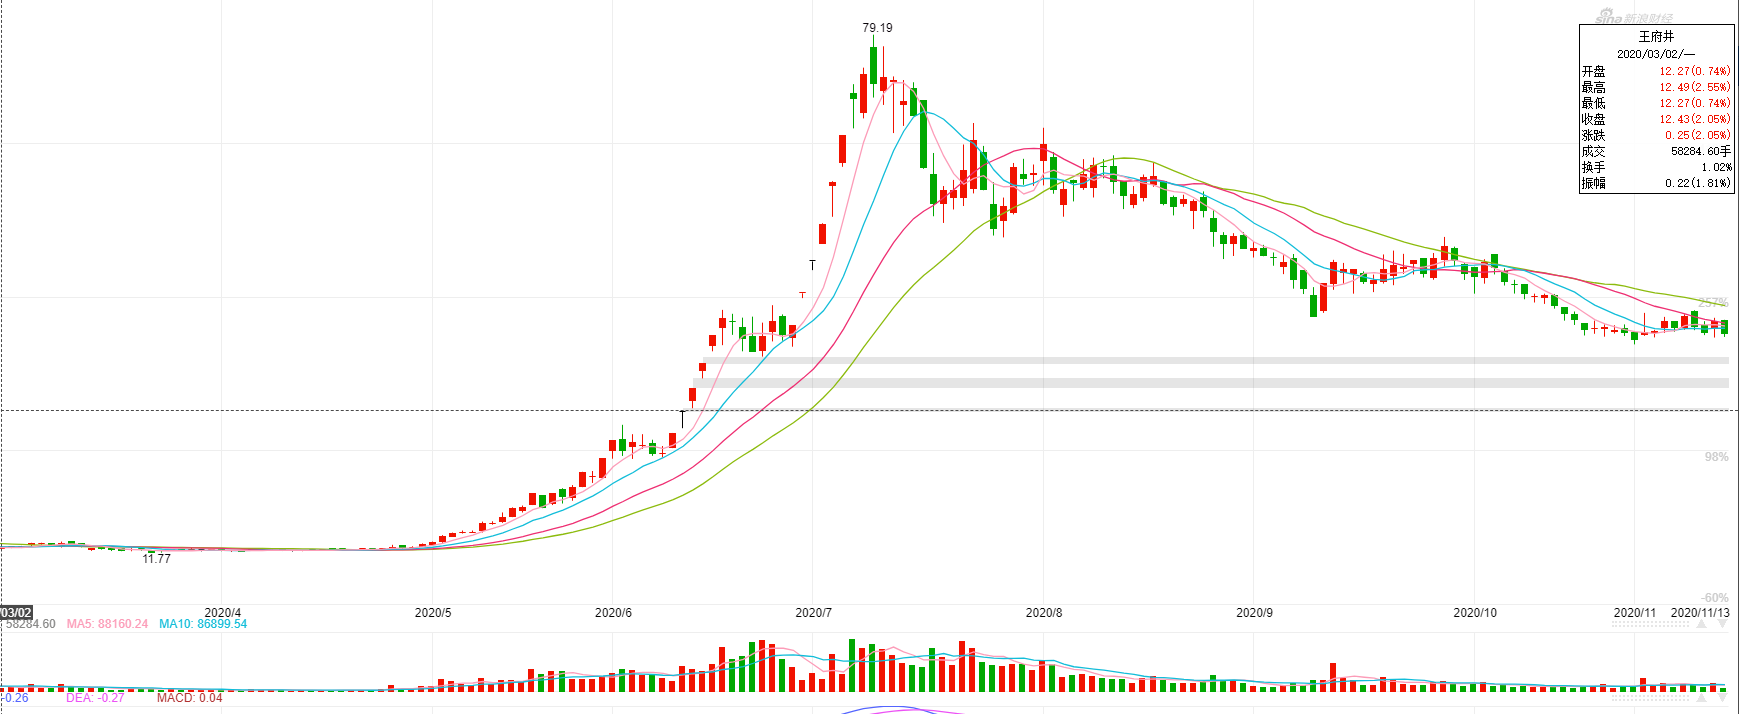

### 四、RSRS右偏标准分交易策略

在使用斜率量化阻力支撑相对强度时，其量化效果很大程度上受拟合本身效果的影响。  
我们将RSRS标准分与决定系数相乘得到RSRS修正标准分，以此降低绝对值很大，但拟合效果很差的RSRS标准分对策略的影响。  
通过这种变换，修正RSRS标准分有明显的向正态修正的效果。

给出如下RSRS右偏标准分交易策略（取值来自研报）：  
1、计算RSRS右偏标准分RSRSrightdev（N = 16, M = 300）    
2、若RSRSrightdev大于Sbuy时，全仓买入；若RSRSrightdev小于Ssell时，卖出平仓。（Sbuy=0.7,Ssell=−0.7）  